<a href="https://colab.research.google.com/github/paulmachau/K-means-clustering-/blob/main/Phoenix_KE_Analytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#loading the dataset
df = pd.read_csv('/content/Synthetic Agent Data.csv')
df.head()

,Unnamed: 0,Agent 0,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,...,Agent 1190,Agent 1191,Agent 1192,Agent 1193,Agent 1194,Agent 1195,Agent 1196,Agent 1197,Agent 1198,Agent 1199
0,0,1,2,1,0,1,1,0,0,0,...,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,1,9,10,8,2,15,7,0,2,2,...,0.0,9.0,8.0,0.0,14.0,0.0,1.0,0.0,7.0,1.0
2,2,9,7,11,3,10,7,0,1,3,...,3.0,9.0,10.0,0.0,9.0,0.0,2.0,1.0,12.0,0.0
3,3,11,14,13,0,8,9,0,0,3,...,1.0,14.0,11.0,1.0,7.0,2.0,3.0,1.0,10.0,2.0
4,4,11,13,7,1,7,8,1,0,4,...,2.0,14.0,8.0,0.0,7.0,1.0,2.0,1.0,15.0,1.0


In [3]:
#defining the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 1201 entries, Unnamed: 0 to Agent 1199
dtypes: float64(917), int64(283), object(1)
memory usage: 797.7+ KB


In [4]:
# checking for missing values

df.isnull().sum()


,0
Unnamed: 0,0
Agent 0,0
Agent 1,0
Agent 2,0
Agent 3,0
...,...
Agent 1195,1
Agent 1196,1
Agent 1197,1
Agent 1198,1


In [5]:
#removing missing values

df = df.dropna()


In [6]:
#droping the first column

df = df.iloc[: , 1:]
df.head()


,Agent 0,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,...,Agent 1190,Agent 1191,Agent 1192,Agent 1193,Agent 1194,Agent 1195,Agent 1196,Agent 1197,Agent 1198,Agent 1199
0,1,2,1,0,1,1,0,0,0,2,...,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,9,10,8,2,15,7,0,2,2,11,...,0.0,9.0,8.0,0.0,14.0,0.0,1.0,0.0,7.0,1.0
2,9,7,11,3,10,7,0,1,3,11,...,3.0,9.0,10.0,0.0,9.0,0.0,2.0,1.0,12.0,0.0
3,11,14,13,0,8,9,0,0,3,14,...,1.0,14.0,11.0,1.0,7.0,2.0,3.0,1.0,10.0,2.0
4,11,13,7,1,7,8,1,0,4,13,...,2.0,14.0,8.0,0.0,7.0,1.0,2.0,1.0,15.0,1.0


In [7]:
# Transpose the dataframe so that each row represents an agent
df_transposed = df.transpose()

# Rename columns to represent days
df_transposed.columns = [f'Day_{i}' for i in range(df_transposed.shape[1])]


In [8]:
#print the new data set

df_transposed.head()


,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,...,Day_74,Day_75,Day_76,Day_77,Day_78,Day_79,Day_80,Day_81,Day_82,Day_83
Agent 0,1.0,9.0,9.0,11.0,11.0,8.0,1.0,2.0,12.0,7.0,...,7.0,7.0,1.0,2.0,7.0,8.0,7.0,11.0,9.0,2.0
Agent 1,2.0,10.0,7.0,14.0,13.0,11.0,2.0,2.0,9.0,7.0,...,14.0,8.0,1.0,2.0,7.0,8.0,11.0,7.0,9.0,2.0
Agent 2,1.0,8.0,11.0,13.0,7.0,14.0,2.0,2.0,15.0,13.0,...,7.0,9.0,2.0,1.0,9.0,7.0,7.0,9.0,11.0,2.0
Agent 3,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Agent 4,1.0,15.0,10.0,8.0,7.0,12.0,2.0,2.0,8.0,8.0,...,7.0,10.0,2.0,2.0,9.0,10.0,7.0,13.0,7.0,2.0


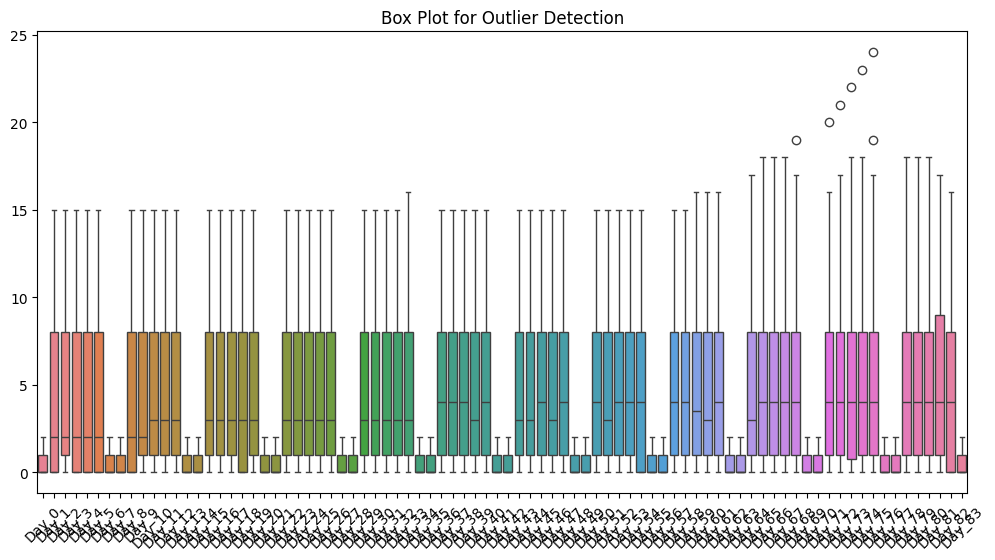

In [9]:
# Checking for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transposed)
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


*Inferences*
* The dataset indicates of minimal  outliers


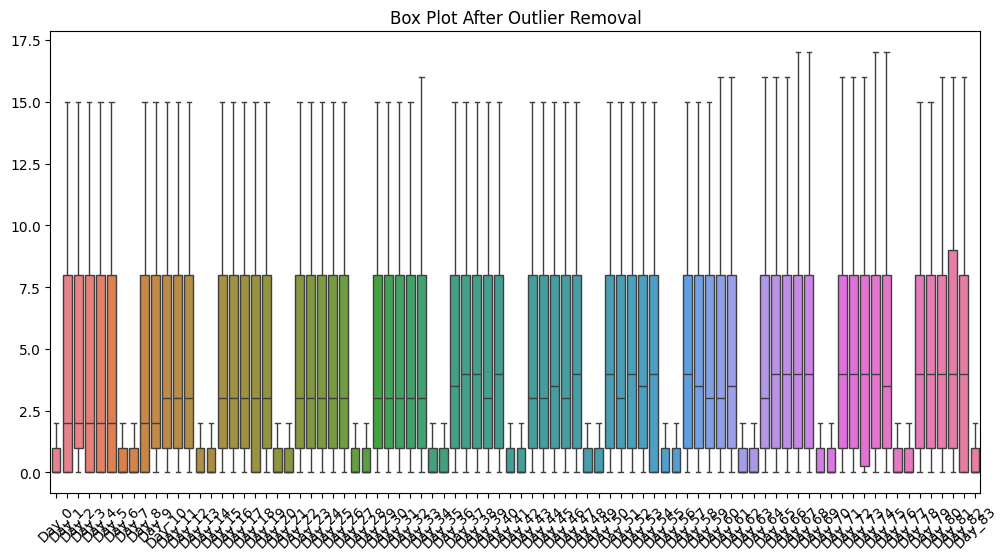

In [10]:
# Removing outliers using IQR method
Q1 = df_transposed.quantile(0.25)
Q3 = df_transposed.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_transposed[~((df_transposed < (Q1 - 1.5 * IQR)) | (df_transposed > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plotting box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers)
plt.title('Box Plot After Outlier Removal')
plt.xticks(rotation=45)
plt.show()


##Statistical Analysis

The code below caculates the Mean,Median and also the minimum and maximum number of tasks per day by each agent

In [11]:

# Calculating the mean, median, max, and min for each agent
agent_stats = pd.DataFrame()
agent_stats['Mean'] = df_transposed.mean(axis=1)
agent_stats['Median'] = df_transposed.median(axis=1)
agent_stats['Max'] = df_transposed.max(axis=1)
agent_stats['Min'] = df_transposed.min(axis=1)

print(agent_stats)


                Mean  Median   Max  Min
Agent 0     6.940476     7.0  14.0  1.0
Agent 1     6.702381     7.0  15.0  1.0
Agent 2     7.000000     7.5  15.0  1.0
Agent 3     0.535714     0.0   3.0  0.0
Agent 4     7.297619     8.0  15.0  1.0
...              ...     ...   ...  ...
Agent 1195  0.309524     0.0   2.0  0.0
Agent 1196  2.083333     2.0   6.0  0.0
Agent 1197  1.714286     1.0   8.0  0.0
Agent 1198  7.285714     7.0  15.0  1.0
Agent 1199  0.595238     0.0   3.0  0.0

[1200 rows x 4 columns]


In [12]:
# Calculating overall statistics
overall_stats = pd.DataFrame()
overall_stats['Mean'] = [df_transposed.values.mean()]
overall_stats['Median'] = [np.median(df_transposed.values)]
overall_stats['Max'] = [df_transposed.values.max()]
overall_stats['Min'] = [df_transposed.values.min()]

# Display the overall statistics
print("\nOverall statistics:\n", overall_stats)



Overall statistics:
        Mean  Median   Max  Min
0  3.542857     1.0  24.0  0.0


**Inference**

* Overall Mean: The average number of tasks completed across all agents and all days is approximately 3.54 tasks per day.
* Overall Median: The median number of tasks completed is 1, indicating that on most days, agents completed around 1 tasks.

* Overall Max: The maximum number of tasks completed in a single day by any agent is 24.
* Overall Min: The minimum number of tasks completed in a single day is 0, indicating some days with no task completions.

From the summury statistics it shows a high variation between the max and Min task done in a day  which has resulted in a low frequency of number of tasks completed in a day indicated by the median



In [13]:
#the standard deviation of their number of tasks completed

agent_stats['Std Dev'] = df_transposed.std(axis=1)
print(agent_stats)


                Mean  Median   Max  Min   Std Dev
Agent 0     6.940476     7.0  14.0  1.0  3.816108
Agent 1     6.702381     7.0  15.0  1.0  3.867628
Agent 2     7.000000     7.5  15.0  1.0  4.032996
Agent 3     0.535714     0.0   3.0  0.0  0.870486
Agent 4     7.297619     8.0  15.0  1.0  4.236331
...              ...     ...   ...  ...       ...
Agent 1195  0.309524     0.0   2.0  0.0  0.559177
Agent 1196  2.083333     2.0   6.0  0.0  1.716036
Agent 1197  1.714286     1.0   8.0  0.0  1.923673
Agent 1198  7.285714     7.0  15.0  1.0  4.249937
Agent 1199  0.595238     0.0   3.0  0.0  0.879746

[1200 rows x 5 columns]


*inferences*

The code above generated the standard deviation of each agent per day, this shows the variability in the number of tasks performed per day ranging from 0-5 with, o indicating a low variablity while as figures close to 5 indicate a high variability

In [14]:
#the standard deviation for overall agents combined

overall_std = df_transposed.values.std()
print("\nOverall standard deviation:", overall_std)



Overall standard deviation: 4.230781543835055


*Inference*

Overall Standard Deviation: The standard deviation of 4.23 indicates a wide variability in the number of tasks completed across all agents and days.

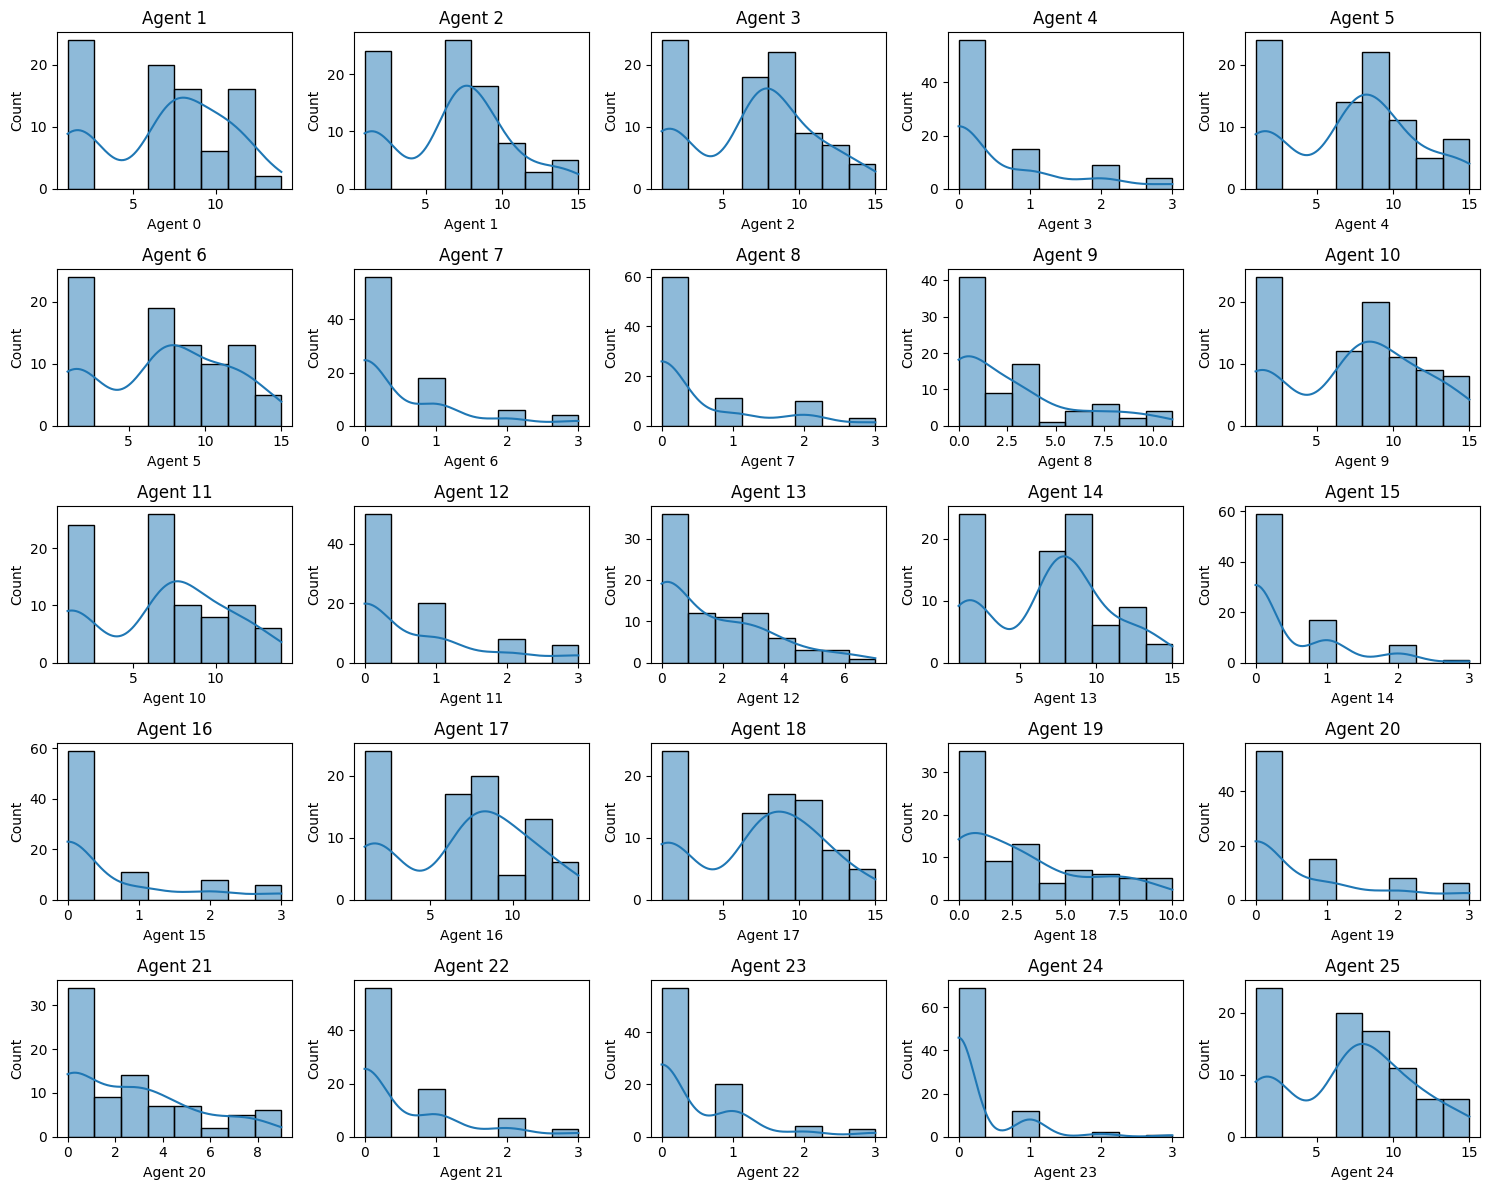

In [15]:
#checking for distribution of data

# Checking distribution of data for each agent
plt.figure(figsize=(15, 12))
num_plots = min(df_transposed.shape[0], 25)

for i in range(num_plots):
    plt.subplot(5, 5, i+1)
    sns.histplot(df_transposed.iloc[i], kde=True)
    plt.title(f'Agent {i+1}')

plt.tight_layout()
plt.show()



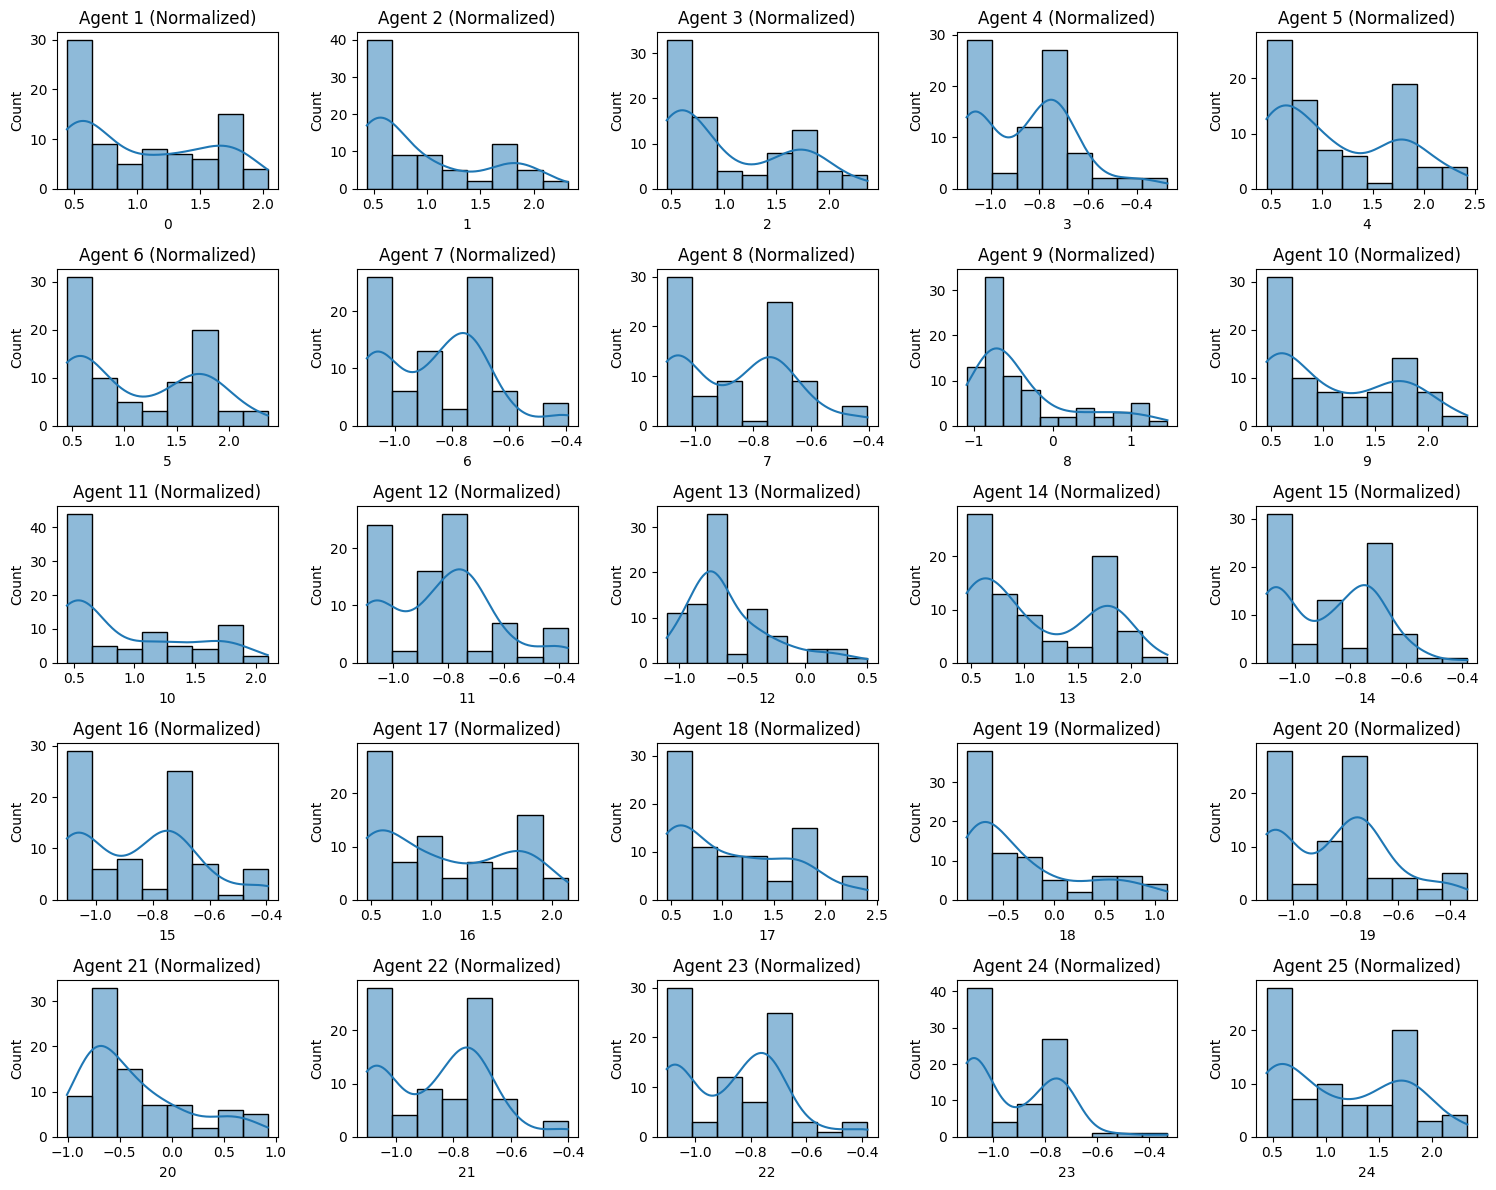

In [16]:
# Normalizing the dataset and plotting graphs

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_transposed)
df_normalized = pd.DataFrame(df_normalized, columns=df_transposed.columns)

# plotting the Normalized dataset
plt.figure(figsize=(15, 12))
num_plots = min(df_normalized.shape[0], 25)  # Limit to 25 plots

for i in range(num_plots):
    plt.subplot(5, 5, i+1)
    sns.histplot(df_normalized.iloc[i], kde=True)
    plt.title(f'Agent {i+1} (Normalized)')

plt.tight_layout()
plt.show()


##Agent Persona

In [17]:
# clustering the data set int three groups
agent_stats = pd.DataFrame({
    'Mean': df_transposed.mean(axis=1),
    'Median': df_transposed.median(axis=1),
    'Max': df_transposed.max(axis=1),
    'Min': df_transposed.min(axis=1),
    'Std Dev': df_transposed.std(axis=1)
})

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
agent_stats_scaled = scaler.fit_transform(agent_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

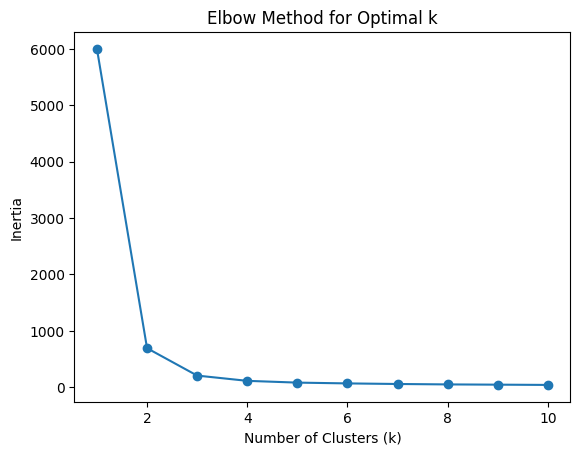

In [18]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(agent_stats_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


*Inferences*

* The elbow method plot indicates that the optimal number of clusters for this data is around 3, based on the clustering analysis, we have the following clusters: low performers, moderate performers and high performers

 *The code below has showed the mean, median, mnimum and standard deviation of each cluster and the variation of each shows the performance levels of each cluster.The graph shows the diferent clusters red- Low perfomers, green- Moderate performers, Blue- the high performers.*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             Mean    Median        Max       Min   Std Dev
Cluster                                                   
0        0.522093  0.081594   3.091082  0.000000  0.816076
1        7.149839  7.481013  14.966245  0.993671  4.167907
2        2.951065  2.650754   9.376884  0.000000  2.769161


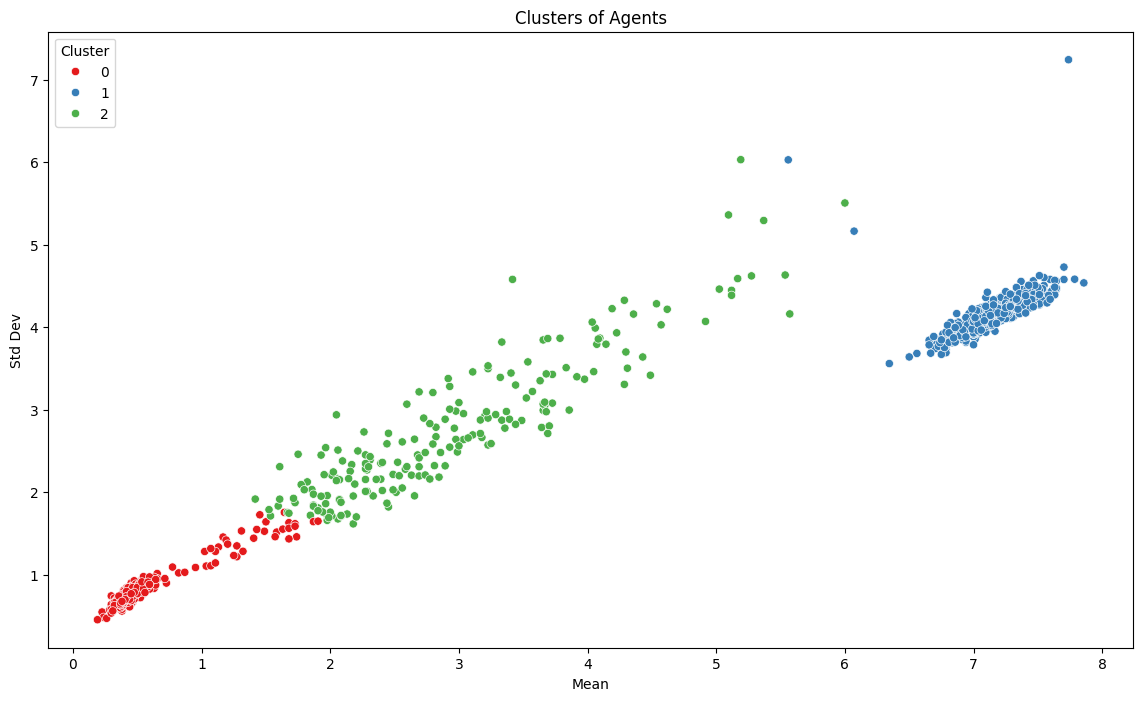

In [19]:
# Assuming from the elbow plot that the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(agent_stats_scaled)
agent_stats['Cluster'] = kmeans.labels_

# Analyzint the characteristics of each cluster
cluster_means = agent_stats.groupby('Cluster').mean()
print(cluster_means)

# Plotting the clusters for visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Mean', y='Std Dev', hue='Cluster', data=agent_stats, palette='Set1')
plt.title('Clusters of Agents')
plt.show()


*Inferences*

**Low Performers (Red)**

* These agents have low mean values, typically below 2.
* Their standard deviation is also low, generally around 1.
* This indicates that these agents consistently complete a very low number of tasks.

**Moderate Performers (Green)**

* These agents have mean values ranging from 1 to around 6.
* Their standard deviation varies widely from 1 to about 5, indicating varying levels of consistency.
* Some moderate performers may have days of higher productivity, leading to a higher standard deviation.

**High Performers (Blue)**

* These agents have high mean values, around 7 and above.
* Their standard deviation is moderate, ranging from about 2 to 4.
* This suggests that while they are highly productive, there is still some variability in their performance.

In [20]:
# Evaluate the quality of the clusters using silhouette score
silhouette_avg = silhouette_score(agent_stats_scaled, agent_stats['Cluster'])
print(f'Silhouette Score for 3 clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.8288481793826251


*inference*

* silhouette score of 0.8288481793826251 is  high indicating that the clusters are well-separated and the clustering is of good quality

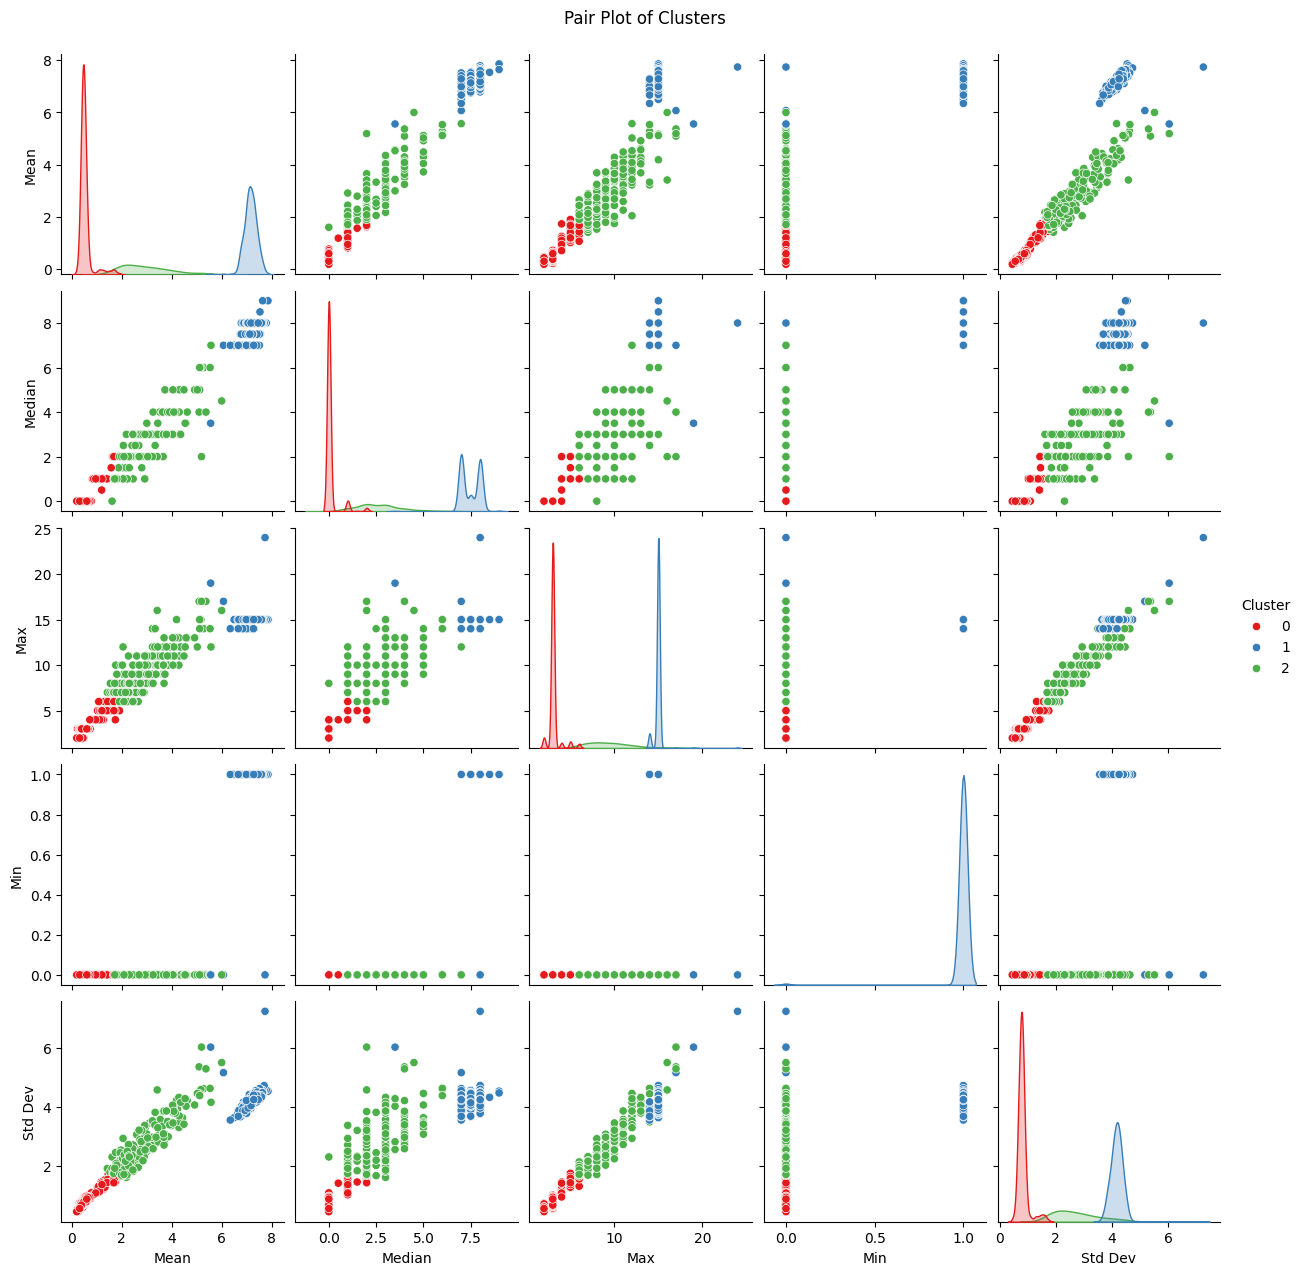

In [21]:
# visualization with pair plots
sns.pairplot(agent_stats, hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

*Inferences*

* The graph below shows better representation of the clusters with the colors reperesenting the same cluster points

##Insetive Structure Design

In [43]:
# prompt: calculating the  overall number of tasks each agent over time

# Calculate the total number of tasks completed by each agent
total_tasks_per_agent = df_transposed.sum(axis=1)

# Print the results
# Print the results
total_tasks_per_agent.head()


,0
Agent 0,583.0
Agent 1,563.0
Agent 2,588.0
Agent 3,45.0
Agent 4,613.0


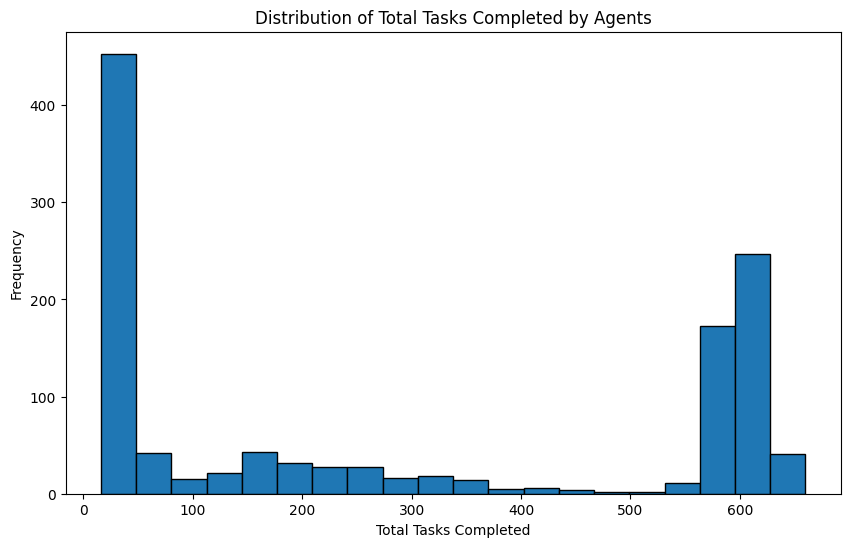

In [44]:
# Creating a histogram to visualize the distribution of total tasks completed
plt.figure(figsize=(10, 6))
plt.hist(total_tasks_per_agent, bins=20, edgecolor='black')
plt.xlabel('Total Tasks Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Total Tasks Completed by Agents')
plt.show()


*Inference*

The histogram shows the distribution  that the agents have a significant divide between low and high performers, with few agents in the middle range

In [22]:
#defining the baseline compesation
# Baseline Payment per Task (in KSH)
baseline_payment = 175

# Display the Baseline Payment
print(f"Baseline Payment per Task: {baseline_payment} KSH")

Baseline Payment per Task: 175 KSH


In [23]:
# Baseline Payment per Task (in KSH)
baseline_payment = 175

# Average Bonus per Task (in KSH)
average_bonus_per_task = 100

# Total average compensation per task
average_compensation_per_task = baseline_payment + average_bonus_per_task

# Display the result
print(f"Total Average Compensation per Task: {average_compensation_per_task} KSH")


Total Average Compensation per Task: 275 KSH


In [24]:
# Ensuring the  average compensation does not exceed 300 KSH
if average_compensation_per_task > 300:
    print("Warning: The average compensation per task exceeds 300 KSH.")
else:
    print(f"Average Compensation per Task: {average_compensation_per_task} KSH")

# Display the result
print(f"Baseline Payment per Task: {baseline_payment} KSH")
print(f"Average Bonus per Task: {average_bonus_per_task} KSH")
print(f"Total Average Compensation per Task: {average_compensation_per_task} KSH")

Average Compensation per Task: 275 KSH
Baseline Payment per Task: 175 KSH
Average Bonus per Task: 100 KSH
Total Average Compensation per Task: 275 KSH


In [45]:
# Apply the bonus structure based on the actual data from df_transposed
def calculate_total_compensation(tasks_completed):
    base_payment = 175  # Base payment per task

    if tasks_completed <= 25:
        bonus_per_task = 0
    elif 26 <= tasks_completed <= 50:
        bonus_per_task = 25
    elif 51 <= tasks_completed <= 75:
        bonus_per_task = 75
    else:  # tasks_completed > 75
        bonus_per_task = 125

    total_compensation_per_task = base_payment + bonus_per_task
    return total_compensation_per_task

# Calculate total tasks completed by each agent over the period
total_tasks_per_agent = df_transposed.sum(axis=1)

# Calculate total compensation per task for each agent
compensation_per_task = total_tasks_per_agent.apply(calculate_total_compensation)

# Create a DataFrame to show the total tasks completed and corresponding compensation
compensation_summary = pd.DataFrame({
    'Total Tasks Completed': total_tasks_per_agent,
    'Total Compensation per Task (KSH)': compensation_per_task
})

# Display the summary
compensation_summary.head(10)


,Total Tasks Completed,Total Compensation per Task (KSH)
Agent 0,583.0,300
Agent 1,563.0,300
Agent 2,588.0,300
Agent 3,45.0,200
Agent 4,613.0,300
Agent 5,618.0,300
Agent 6,42.0,200
Agent 7,40.0,200
Agent 8,218.0,300
Agent 9,625.0,300


*Inferences*

The compensation model with bonuses of 0, 50, 100, and 125 KSH per task was chosen based on the need to motivate agents at different performance levels while ensuring that the average compensation per task stays within the financial limit of 300 KSH

**0 KSH Bonus (1-25 tasks) -**
* This level was set to cover the baseline cost and provide a minimum but fair compensation of 175 KSH per task for agents who complete fewer tasks.
* The absence of a bonus at this level acts as a baseline, motivating agents to aim for higher task completion to access additional compensation.

**50 KSH Bonus (26-50 tasks) -**
* This level introduces a modest bonus raising the total compensation to 225 KSH per task.
* The 50 KSH bonus is designed to create a clear financial incentive for agents to move from the lower performance tier to a more productive one

**100 KSH Bonus (51-75 tasks) -**
* A bonus of 100 KSH per task, bringing total compensation to 275 KSH.
* This range targets agents who are moderately productive and pushes them towards higher productivity.

**125 KSH Bonus (76+ tasks) -**
* The maximum bonus of 125 KSH per task, making total compensation 300 KSH per task.

* This range is designed to reward top performers significantly, encouraging them to maximize their output


##Financial Evalaution

In [48]:
# prompt: calculating the number of agents in each range ie: 0,25,50,100 and 125

# Calculate the number of agents in each bonus range
agent_counts = pd.cut(compensation_summary['Total Tasks Completed'],
                      bins=[0, 25, 50, 75, float('inf')],
                      labels=['0 KSH Bonus', '25 KSH Bonus', '75 KSH Bonus', '125 KSH Bonus']).value_counts()

print(agent_counts)


Total Tasks Completed
125 KSH Bonus    706
25 KSH Bonus     460
75 KSH Bonus      25
0 KSH Bonus        9
Name: count, dtype: int64


###**Scenario 1**

In [49]:
# Assuming we have the following number of agents in each tier (based on historical data or assumptions)
agents_tier_1_2 = {
    'Tier 1': 9,  # Agents completing 1-25 tasks
    'Tier 2': 25,  # Agents completing 26-50 tasks
}

# Compensation per task in each tier
compensation_per_tier_1_2 = {
    'Tier 1': 175,  # KSH per task
    'Tier 2': 225,  # KSH per task
}

# Calculate the average compensation
total_agents_1_2 = sum(agents_tier_1_2.values())
total_compensation_1_2 = sum(agents_tier_1_2[tier] * compensation_per_tier_1_2[tier] for tier in agents_tier_1_2)
average_compensation_1_2 = total_compensation_1_2 / total_agents_1_2

print(f"Scenario 1: Average Compensation per Task = {average_compensation_1_2:.2f} KSH")


Scenario 1: Average Compensation per Task = 211.76 KSH


*Inferences*

 The code above Verifies if the average compensation stays below 300 KSH when most agents fall into Tiers 1 and 2 and as the out put has shown the average is *211.76*

**Scenario

In [50]:
# Agents in Tier 3
agents_tier_3 = {
    'Tier 3': 460,  # Agents completing 51-75 tasks
}

# Compensation per task in Tier 3
compensation_per_tier_3 = {
    'Tier 3': 275,  # KSH per task
}

# Calculate the average compensation
total_agents_3 = sum(agents_tier_3.values())
total_compensation_3 = sum(agents_tier_3[tier] * compensation_per_tier_3[tier] for tier in agents_tier_3)
average_compensation_3 = total_compensation_3 / total_agents_3

print(f"Scenario 2: Average Compensation per Task = {average_compensation_3:.2f} KSH")


Scenario 2: Average Compensation per Task = 275.00 KSH
